# Garanti BBVA Teknoloji Data Science Challenge

### Individual Pension Plan (IPP) – Additional Contribution Predicting

#### Which customers will pay additional contribution, how much additional contribution amount will be paid by those customers? 

#### Problem lojistik ve doğrusal regresyon kullanılarak iki aşamalı çözüldü.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn import linear_model, preprocessing

In [3]:
train_data = pd.read_csv("train.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173589 entries, 0 to 173588
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CUSTNBR          173589 non-null  float64
 1   TRAN_DATE        173589 non-null  object 
 2   ADDCONTAMNT      173589 non-null  int64  
 3   ACCMVMTAVG       140480 non-null  float64
 4   ACCAMNTAVG03     138509 non-null  float64
 5   ACCACVNUM12      154577 non-null  float64
 6   ACCAMNTAVG12     132223 non-null  float64
 7   CARDDINSUM12     123997 non-null  float64
 8   DISTNUM12        173589 non-null  int64  
 9   INTPHNNUM03      173589 non-null  int64  
 10  INTLOGNUM12      173589 non-null  int64  
 11  DEMINFO1         173589 non-null  int64  
 12  DEMINFO2         173589 non-null  int64  
 13  BLNAMNT03        15780 non-null   float64
 14  CRRASTALL        172485 non-null  float64
 15  ASTAVGDIF0312    168030 non-null  float64
 16  EFTAMNTSUM12     86544 non-null   floa

In [5]:
train_data.corr().ADDCONTAMNT

CUSTNBR            0.080942
ADDCONTAMNT        1.000000
ACCMVMTAVG         0.065570
ACCAMNTAVG03       0.117701
ACCACVNUM12        0.020605
ACCAMNTAVG12       0.044771
CARDDINSUM12       0.083875
DISTNUM12          0.001024
INTPHNNUM03        0.018630
INTLOGNUM12        0.013204
DEMINFO1           0.094868
DEMINFO2           0.035046
BLNAMNT03          0.344286
CRRASTALL          0.198337
ASTAVGDIF0312      0.051742
EFTAMNTSUM12       0.055228
MAXMATEVR         -0.095932
DEBTAVG00          0.017369
LSTPRDCNUM        -0.019438
DESACCUAMNT        0.309601
CONTPAIDAMNT00     0.133050
CONTPAIDAMNT01     0.113871
CONTPAIDAMNT02     0.126487
CONTPAIDAMNT03     0.147962
CONTPAIDAMNT04     0.130338
CONTPAIDAMNT05     0.147859
CONTPAIDAMNT06     0.149876
CONTPAIDAMNT07     0.156256
CONTPAIDAMNT08     0.136008
CONTPAIDAMNT09     0.135599
CONTPAIDAMNT10     0.130291
CONTPAIDAMNT11     0.136720
CONTDEBTNUM       -0.053126
CONTMONTHAMNT      0.182242
RTRNDESVAMNT       0.269136
MAXTIMECONTR       0

#### korelasyon katsayısı 0.1'den küçük olan değişkeni attım

In [6]:
train_after = train_data.drop(['TRAN_DATE','ACCMVMTAVG', 'ACCACVNUM12', 'ACCAMNTAVG12', 'CARDDINSUM12', 
                               'DISTNUM12', 'INTPHNNUM03', 'INTLOGNUM12', 'DEMINFO1', 'DEMINFO2', 'ASTAVGDIF0312',
                               'EFTAMNTSUM12', 'MAXMATEVR', 'DEBTAVG00', 'LSTPRDCNUM', 'CONTPAIDAMNT07', 'CONTDEBTNUM',
                               'MAXTIMECONTR', 'LASTAUTOPAYTIME'], axis=1)

In [7]:
train_after.isnull().sum()

CUSTNBR                0
ADDCONTAMNT            0
ACCAMNTAVG03       35080
BLNAMNT03         157809
CRRASTALL           1104
DESACCUAMNT            0
CONTPAIDAMNT00     44634
CONTPAIDAMNT01     44634
CONTPAIDAMNT02     44634
CONTPAIDAMNT03     44634
CONTPAIDAMNT04     44634
CONTPAIDAMNT05     44634
CONTPAIDAMNT06     44634
CONTPAIDAMNT08     44634
CONTPAIDAMNT09     44634
CONTPAIDAMNT10     44634
CONTPAIDAMNT11     44634
CONTMONTHAMNT          0
RTRNDESVAMNT           0
CONTCOLLAMNT           0
TIMEDEPAVG12      136748
dtype: int64

#### veri kümesinde doldurulması gereken boş değerler gözüküyor

In [8]:
train_after.describe().astype(int)

,CUSTNBR,ADDCONTAMNT,ACCAMNTAVG03,BLNAMNT03,CRRASTALL,DESACCUAMNT,CONTPAIDAMNT00,CONTPAIDAMNT01,CONTPAIDAMNT02,CONTPAIDAMNT03,...,CONTPAIDAMNT05,CONTPAIDAMNT06,CONTPAIDAMNT08,CONTPAIDAMNT09,CONTPAIDAMNT10,CONTPAIDAMNT11,CONTMONTHAMNT,RTRNDESVAMNT,CONTCOLLAMNT,TIMEDEPAVG12
count,173589,173589,138509,15780,172485,173589,128955,128955,128955,128955,...,128955,128955,128955,128955,128955,128955,173589,173589,173589,36841
mean,85136,782,12339,31287,76311,21315,472,458,447,441,...,426,411,397,387,386,388,524,5527,11386,132070
std,48718,7909,117520,126805,798376,97157,1067,1023,883,907,...,909,775,801,857,805,854,736,38796,27603,553890
min,7,0,100,100,100,100,0,0,0,0,...,0,0,0,0,0,0,101,-467736,100,160
25%,42977,0,176,2081,855,688,0,0,0,0,...,0,0,0,0,0,0,328,131,730,3137
50%,85508,0,785,8545,5337,3851,340,340,340,328,...,328,328,310,310,298,298,340,396,3522,24100
75%,127522,0,3944,24885,23498,15158,485,467,460,460,...,460,460,428,422,422,418,460,2152,11458,104632
max,168601,1260100,20367648,5931786,158932032,8290769,115780,135676,57954,57938,...,61415,43300,58564,117028,58564,54100,51100,4421829,2362900,29983090


In [9]:
train_after.mode()

,CUSTNBR,ADDCONTAMNT,ACCAMNTAVG03,BLNAMNT03,CRRASTALL,DESACCUAMNT,CONTPAIDAMNT00,CONTPAIDAMNT01,CONTPAIDAMNT02,CONTPAIDAMNT03,...,CONTPAIDAMNT05,CONTPAIDAMNT06,CONTPAIDAMNT08,CONTPAIDAMNT09,CONTPAIDAMNT10,CONTPAIDAMNT11,CONTMONTHAMNT,RTRNDESVAMNT,CONTCOLLAMNT,TIMEDEPAVG12
0,39187.0,0.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,328.0,100.0,298.0,250.0
1,49489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,102893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,124307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,145663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,154697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,158246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,163185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### değişken istatistiklerine nazaran boş değerleri doldurdum

In [10]:
train_after.fillna(value={'ACCAMNTAVG03': 100, 'BLNAMNT03': 100, 'CRRASTALL': 100, 'CONTPAIDAMNT00': 0,
                         'CONTPAIDAMNT01': 0, 'CONTPAIDAMNT02': 0, 'CONTPAIDAMNT03': 0, 'CONTPAIDAMNT04': 0,
                         'CONTPAIDAMNT05': 0, 'CONTPAIDAMNT06': 0, 'CONTPAIDAMNT08': 0, 'CONTPAIDAMNT09': 0,
                         'CONTPAIDAMNT10': 0, 'CONTPAIDAMNT11': 0, 'TIMEDEPAVG12': 3137}, inplace=True)

In [11]:
pg.pairwise_corr(train_after, columns= ['ADDCONTAMNT']).sort_values(by=['r'])[['X', 'Y', 'r', 'p-unc']]

,X,Y,r,p-unc
0,ADDCONTAMNT,CUSTNBR,0.080942,4.043275e-250
6,ADDCONTAMNT,CONTPAIDAMNT01,0.106517,0.000000e+00
1,ADDCONTAMNT,ACCAMNTAVG03,0.117297,0.000000e+00
7,ADDCONTAMNT,CONTPAIDAMNT02,0.117677,0.000000e+00
14,ADDCONTAMNT,CONTPAIDAMNT10,0.120865,0.000000e+00
9,ADDCONTAMNT,CONTPAIDAMNT04,0.120953,0.000000e+00
5,ADDCONTAMNT,CONTPAIDAMNT00,0.123101,0.000000e+00
13,ADDCONTAMNT,CONTPAIDAMNT09,0.125345,0.000000e+00
12,ADDCONTAMNT,CONTPAIDAMNT08,0.125840,0.000000e+00
15,ADDCONTAMNT,CONTPAIDAMNT11,0.126324,0.000000e+00


#### değişkenler arası korelasyon anlamlı

In [12]:
df1 = train_after.set_index('CUSTNBR')
df2 = df1.copy()
df2.loc[df2.ADDCONTAMNT > 0, 'ADDCONTAMNT'] = 1

In [13]:
y = df2.iloc[:, 0]
x = df2.iloc[:, 1:20]
x = preprocessing.StandardScaler().fit(x).transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(x_train, y_train)
yhat = log_reg.predict(x_test)

In [15]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     31284
           1       0.58      0.10      0.16      3434

    accuracy                           0.90     34718
   macro avg       0.74      0.54      0.56     34718
weighted avg       0.88      0.90      0.87     34718



#### accuracy = 0.9

In [16]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  330  3104]
 [  240 31044]]


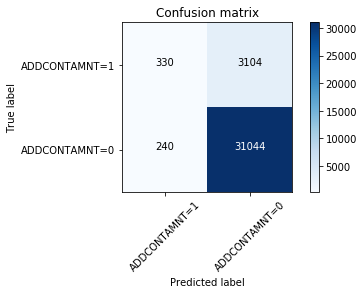

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ADDCONTAMNT=1','ADDCONTAMNT=0'], normalize= False,  title='Confusion matrix')

In [18]:
y1 = df1.ADDCONTAMNT
x1 = df1.iloc[:, 1:20]
x1 = preprocessing.StandardScaler().fit(x1).transform(x1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

In [19]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x1_train, y1_train)
pred = lin_reg.predict(x1_test)

In [20]:
np.sqrt(mean_squared_error(y1_test, pred))

4393.613690157642

In [21]:
ytdf = pd.DataFrame(y1_test)
ytdf['yhat'] = yhat
ytdf['pred'] = pred
ytdf.loc[ytdf.yhat == 0, 'pred'] = 0
ytdf

,ADDCONTAMNT,yhat,pred
CUSTNBR,,,
896.0,0,0,0.000000
80940.0,0,0,0.000000
167863.0,0,1,8138.004182
57143.0,0,0,0.000000
100795.0,0,0,0.000000
...,...,...,...
123359.0,0,0,0.000000
55493.0,0,0,0.000000
87785.0,0,0,0.000000


In [22]:
np.sqrt(mean_squared_error(ytdf.ADDCONTAMNT, ytdf.pred))

4429.93823972861